## HW1: Logistic regression and Linear Regression using Gradient Descent
In hw1, you need to implement linear regression by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get no points by simply calling sklearn.linear_model.LinearRegression

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Part 1. Linear regression model

## Load regression data

In [11]:
x_train, x_test, y_train, y_test = np.load('regression_data.npy', allow_pickle=True)

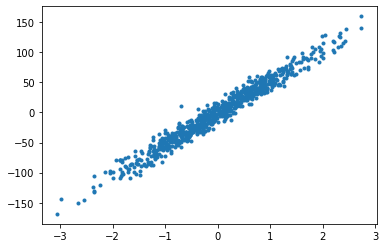

In [12]:
plt.plot(x_train, y_train, '.')

## Train your model 
### Pseudo code:
1. Random initialize the weights, intercepts of the linear model

**for i in range(iteration)**

    2. Feed foward the training data into the model, get the output prediction
    3. Calculating training loss by Mean Square Error of predcition and ground truth data
    4. Calculating the gradients
    5. Updating the weights and intercepts by the gradients * learning rate 
    
**End of training**

In [13]:
# calculate mean square error
def Mean_square_error(truth, prediction):
    sum = 0
    # add up the sum of all squared error (prediction - ground truth)
    for i in range(truth.size):
        tmp = truth[i] - prediction[i]
        sum += tmp ** 2
    return sum / truth.size
linear_loss = [] # storing the loss of every epoch

# update the weight and intercept via gradient descent
def linear_train(x_train, y_train):
    # initialize randomly ~N(0, 1)
    W = np.random.normal(0, 1, 2)
    epoch = 100 # number of iterations
    learning_rate = 0.1 # learning rate 
    for i in range(epoch):
        sum_a = 0
        sum_b = 0
        for j in range(y_train.size):
            # gradient of mean square error
            n = y_train[j] - W[0] * x_train[j] - W[1]
            sum_a += n * x_train[j]
            sum_b += n
        # update the weight and intercept
        W[0] = W[0] + learning_rate * sum_a / y_train.size
        W[1] = W[1] + learning_rate * sum_b / y_train.size
        # store the loss of every epoch in linear_loss
        linear_loss.append(Mean_square_error(y_train, W[0] * x_train + W[1]))
    return W;

# predict output via linear regression
def linear_regression(x_test):
    # get the coefficients
    W = linear_train(x_train, y_train)
    # calculate prediction
    y_pred = np.array([])
    y_pred = W[0] * x_test + W[1]
    return W[0], W[1], y_pred

## Test the performance on the testing data
Inference the test data (x_test) by your model and calculate the loss of (y_test, y_pred)

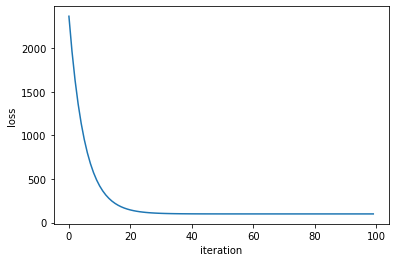

Mean Square Error: 110.42849504890845
Weight: 52.74039460801153
Intercept: -0.3342211275137895


In [14]:
# predict output via the linear regression model
weight, intercept, y_pred = linear_regression(x_test)

# plot the learning curve
plt.plot(linear_loss)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

# output mean square error
print('Mean Square Error:', Mean_square_error(y_test, y_pred)[0])
# output weights and intercepts
print('Weight:', weight)
print('Intercept:', intercept)

# Part 2. Logistic regreesion model

## Load classification data

In [15]:
x_train, x_test, y_train, y_test = np.load('classification_data.npy', allow_pickle=True)

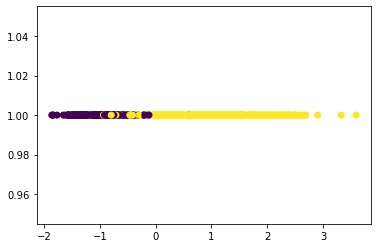

In [16]:
plt.scatter(x_train, np.ones_like(x_train), c=y_train)

In [17]:
# sigmoid function
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

# calculate the cross entropy error
def cross_entropy_error(y_test, y_pred):
    ln = np.log
    sum = 0
    for i in range(len(y_test)):
        tmp = y_test[i] * ln(sigmoid(y_pred[i])) + (1 - y_test[i]) * ln(1 - sigmoid(y_pred[i]))
        sum += tmp
    return -sum
logistic_loss = [] # storing the loss of every epoch

# update the weight and intercept via gradient descent
def logistic_train(x_train, y_train):
    # initialize weight and intercept ~N(0, 1)
    W = np.random.normal(0, 1, 2)
    epoch = 200 # number of iterations
    learning_rate = 0.001 # learning rate
    # update weight and intercept
    for i in range(epoch):
        sum_a = 0
        sum_b = 0
        for j in range(len(y_train)):
            # gradient of cross entropy error
            n = sigmoid(W[0] * x_train[j] + W[1]) - y_train[j]
            sum_a += n * x_train[j]
            sum_b += n
        W[0] -= learning_rate * sum_a
        W[1] -= learning_rate * sum_b
        # store the cross entropy loss in logistic_loss
        logistic_loss.append(cross_entropy_error(y_train, W[0] * x_train + W[1]))
    return W

# predict output via logostic regression
def logistic_regression(x_test):
    # get the coefficients
    W = logistic_train(x_train, y_train)
    # calculate prediction
    y_pred = np.array([])
    y_pred = W[0] * x_test + W[1]
    return W[0], W[1], y_pred

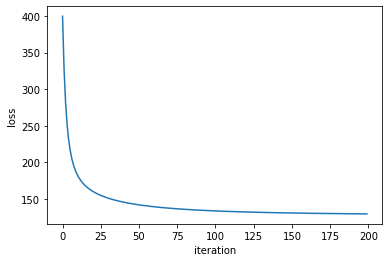

Cross Entropy Error: 45.417762925320105
Weight: 4.218809927370106
Intercept: 1.3128500126356886


In [18]:
# predict output via the linear regression model
weight, intercept, y_pred = logistic_regression(x_test)

# plot the learning curve
plt.plot(logistic_loss)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

# output cross entropy error
print('Cross Entropy Error:', cross_entropy_error(y_test, y_pred)[0])
# output weights and intercepts
print('Weight:', weight)
print('Intercept:', intercept)